In [53]:
# conventional way to import pandas
import pandas as pd
# conventional way to import seaborn
import seaborn as sns
# conventional way to import numpy
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/Boston.csv", index_col=0)

Viewing the data in seaborn to get a sense of it
        - MEDV     Median value of owner-occupied homes in $1000's
        - LSTAT    lower status of the population

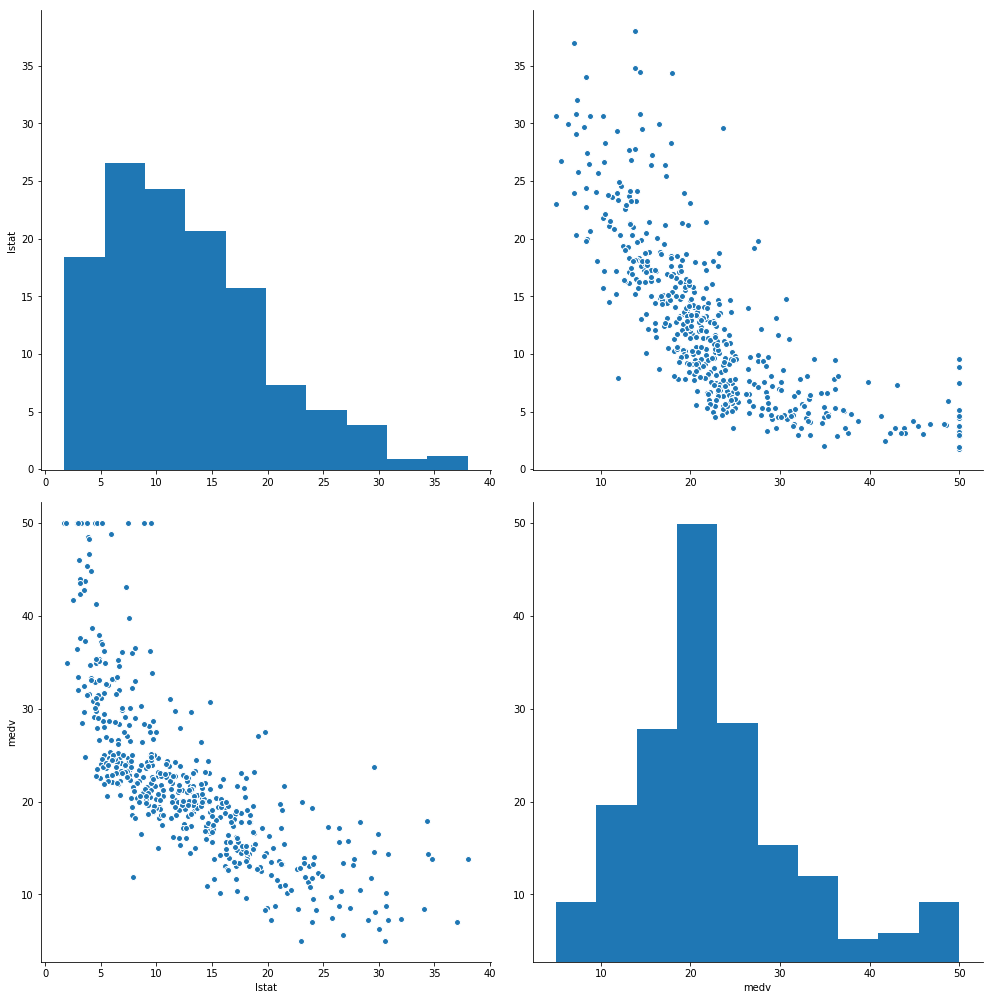

In [54]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(data, x_vars='lstat', y_vars='medv', size=7, aspect=0.7, kind='reg')
sns.pairplot(data[['lstat','medv']],size=7)
plt.show()

Displaying head to see the data

In [55]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
# create a Python list of feature names
feature_cols = ['lstat']

# use the list to select a subset of the original DataFrame
X = data[feature_cols].values

# select a Series from the DataFrame
y = data['medv'].values

# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

# print the intercept and coefficients
print('intercept: \n', linreg.intercept_)

# The coefficients
print('Coefficients: \n', linreg.coef_)

# make predictions on the testing set
y_pred = linreg.predict(X)

# calculate RMSE using scikit-learn
np.sqrt(metrics.mean_squared_error(y, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y, y_pred))

intercept: 
 34.5538408794
Coefficients: 
 [-0.95004935]
Variance score: 0.54


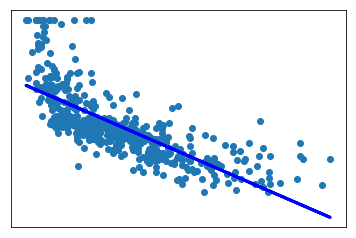

In [57]:
# Plot outputs
plt.scatter(X, y)
plt.plot(X, linreg.predict(X), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Display detailed info about the fit. The book also says that the "there is some evidence of non-linearity." So we should 
reflect that by refing to the R2 score that should be 0.95 to ge a good fit right??? Henrik :D :D ?

In [58]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 18 Feb 2018   Prob (F-statistic):           5.08e-88
Time:                        20:06:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

The obtained the predictions produced by linear regression. Look at the residuals, the difference between the real target set and the predicted target set:

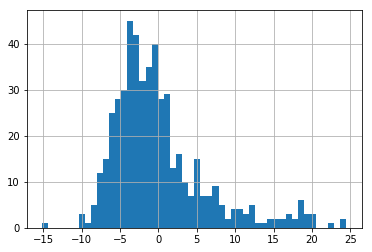

In [59]:
pd.Series(y - y_pred).hist(bins=50)
plt.show()

Q-Q plot. As it shows in the plot the data is not normal distrubuted.

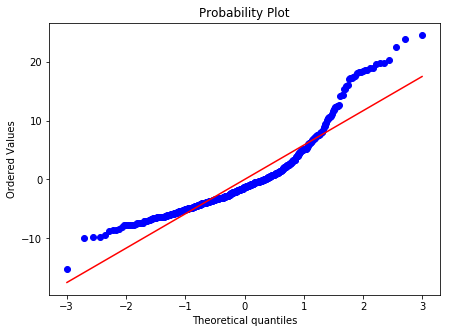

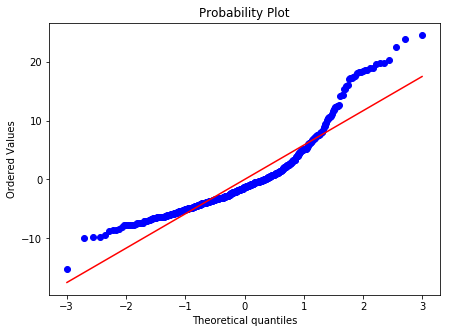

In [61]:
from scipy.stats import probplot 
f = plt.figure(figsize=(7, 5)) 
ax = f.add_subplot(111)
tuple_out = probplot(y - y_pred, plot=ax)
plt.show()